<hr style="border-width:2px;border-color:#75ADR1">

# Models

### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as pximport 
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression, mutual_info_regression, RFE, RFECV
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score, accuracy_score


from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


from sklearn import svm
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

import warnings
warnings.filterwarnings('ignore')

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import xgboost as xgb

In [2]:
df_training_norm  = pd.read_csv('df_training_norm.csv', sep = ',', index_col=0)

In [3]:
df_training_norm.head()

,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,OVER_15MINS_CALLS_PER_MONTH,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURNED
0,0.222222,0.104513,0.006667,0.000000,0.879223,0.034483,1.00,0.75,1.0
1,0.106953,0.224967,0.523333,0.168539,0.286337,0.931034,0.75,0.75,0.0
2,0.070269,0.594919,0.006667,0.146067,0.926117,0.689655,0.50,0.75,1.0
3,0.089232,0.323442,0.616667,0.000000,0.984040,0.448276,0.75,0.75,0.0
4,0.148148,0.349223,0.673333,0.000000,0.287779,0.620690,1.00,1.00,0.0


In [4]:
df_training_norm.columns

Index(['DATA', 'INCOME', 'OVERCHARGE', 'LEFTOVER', 'HOUSE',
       'OVER_15MINS_CALLS_PER_MONTH', 'REPORTED_SATISFACTION',
       'CONSIDERING_CHANGE_OF_PLAN', 'CHURNED'],
      dtype='object')

In [5]:
selectedCols = ['DATA','INCOME', 'HOUSE', 'OVERCHARGE', 'OVER_15MINS_CALLS_PER_MONTH', 'REPORTED_SATISFACTION',
       'CONSIDERING_CHANGE_OF_PLAN', 'LEFTOVER']

## Logistic Regression

In [6]:
X = df_training_norm.drop(['CHURNED'], axis = 1)
Y = df_training_norm['CHURNED']

x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=100)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
clf_LR = LogisticRegression(random_state=1).fit(x_train, y_train)

In [8]:
clf_LR.score(x_train, y_train)

0.7096437153902414

In [9]:
clf_LR.score(x_test, y_test)

0.7112411199331383

In [10]:
y_pred_LR = clf_LR.predict(x_test)
y_proba_LR = clf_LR.predict_proba(x_test)

In [11]:
y_pred_LR = clf_LR.predict(x_test)
roc_auc_score(y_pred_LR, y_test)

0.6885211797345823

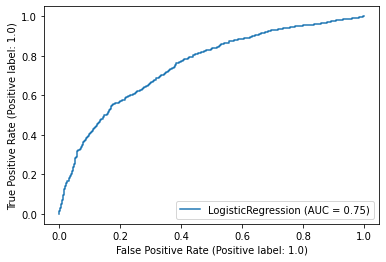

In [12]:
metrics.plot_roc_curve(clf_LR, x_test, y_test) ;

## SVM 

In [13]:
X = df_training_norm.drop(['CHURNED'], axis = 1)
Y = df_training_norm['CHURNED']


x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=10)

In [14]:
clf_SVM = svm.SVC(gamma= 0.01, kernel = 'poly')
clf_SVM.fit(x_train, y_train)

SVC(gamma=0.01, kernel='poly')

In [15]:
clf_SVM.score(x_train, y_train)

0.6354612893114617

In [16]:
clf_SVM.score(x_test, y_test)

0.6335144170497283

In [17]:
parametres = {'C':[0.1, 1, 10], 'kernel':['rbf', 'linear', 'poly'], 'gamma':[0.001, 0.1, 0.5]}

In [ ]:
grid_clf_SVM = model_selection.GridSearchCV(estimator = clf_SVM, param_grid = parametres, scoring = 'roc_auc')
grille = grid_clf_SVM.fit(x_train,y_train)
print(grid_clf_SVM.best_params_)

In [18]:
clf_SVM = svm.SVC(gamma= 0.5, kernel = 'rbf', C=10)
clf_SVM.fit(x_train, y_train)

SVC(C=10, gamma=0.5)

In [19]:
clf_SVM.score(x_train, y_train)

0.7395256504022568

In [20]:
clf_SVM.score(x_test, y_test)

0.7384036773923944

In [21]:
y_pred_SVM = clf_SVM.predict(x_test)
roc_auc_score(y_pred_SVM, y_test)

0.7289952919758407

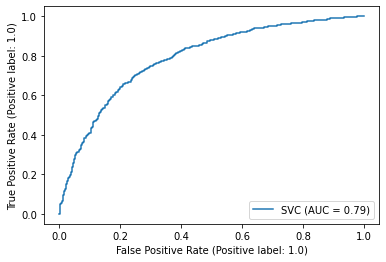

In [22]:
metrics.plot_roc_curve(clf_SVM, x_test, y_test) 

## Random Forest Regressor

In [23]:
X = df_training_norm.drop(['CHURNED'], axis = 1)
Y = df_training_norm['CHURNED']

x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=10)

Hay que optimizar los hyperparametros!!

In [24]:
parametres = { 
    'n_estimators': [100,200,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [8,12,15,18],
    'criterion' :['gini', 'entropy']
}

In [ ]:
grid_clf_RF = model_selection.GridSearchCV(estimator=clf_RF, param_grid= parametres, scoring = 'roc_auc')
grille = grid_clf_RF.fit(x_train, y_train)
print(grid_clf_RF.best_params_)

In [25]:
#clf_RF = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=100)
clf_RF = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=100, max_features='auto', criterion='entropy')
clf_RF.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=300,
                       random_state=100)

In [26]:
clf_RF.score(x_train, y_train)

0.9578936370285237

In [27]:
clf_RF.score(x_test, y_test)

0.7797743418303384

In [28]:
y_pred_RF = clf_RF.predict(x_test)
roc_auc_score(y_pred_RF, y_test)

0.7651812759381269

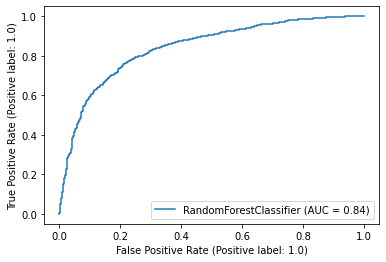

In [29]:
metrics.plot_roc_curve(clf_RF, x_test, y_test) 

## XGboost

In [ ]:
X = df_training_norm.drop(['CHURNED'], axis = 1)
Y = df_training_norm['CHURNED']


x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=10)

# Init classifier
cl_XGB = xgb.XGBClassifier(base_score=0.3, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=0.8, colsample_bytree=0.9, gamma=0.4,
              learning_rate=0.0400000012, max_delta_step=20, max_depth=14,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=75,  reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

cl_XGB.fit(x_train, y_train)


In [ ]:
cl_XGB.score(x_train, y_train)

In [ ]:
cl_XGB.score(x_test, y_test)

In [ ]:
y_pred_XGB = cl_XGB.predict(x_test)
roc_auc_score(y_pred_XGB, y_test)

In [ ]:
metrics.plot_roc_curve(cl_XGB, x_test, y_test) 

In [ ]:
# predThresH = (clf_RF.predict_proba(x_test)[:,1] >= 0.38).astype('int')
# accuracy_score(predThresH, y_test)
# roc_auc_score(predThresH, y_test)

### The best method is Random Forest

In [30]:
predThresH = (clf_RF.predict_proba(x_test)[:,1] >= 0.55).astype('int')
accuracy_score(predThresH, y_test)

0.7735060593397409

In [31]:
predThresH = (clf_RF.predict_proba(x_test)[:,1] >= 0.54).astype('int')
accuracy_score(predThresH, y_test)

0.7760133723359799

In [32]:
predThresH = (clf_RF.predict_proba(x_test)[:,1] >= 0.56).astype('int')
accuracy_score(predThresH, y_test)

0.7747597158378604

In [33]:
threshold = 0.55

# Client discount

In [34]:
xToAnalyse = df_training_norm.copy()
#xToAnalyse = pd.read_csv('df_validation_norm.csv', sep = ',')

In [35]:
xToAnalyse["CHURN_LABEL"] = (clf_RF.predict_proba(xToAnalyse[selectedCols])[:,1] >= threshold).astype('int')
xToAnalyse["CHURN_PROBABILITY"] = clf_RF.predict_proba(xToAnalyse[selectedCols])[:,1]

In [36]:
xToAnalyse["CHURN_PROBABILITY"].head(10)

0    0.365404
1    0.799442
2    0.892042
3    0.332996
4    0.784324
5    0.360409
6    0.799240
7    0.754057
8    0.301278
9    0.689955
Name: CHURN_PROBABILITY, dtype: float64

In [37]:
df_training = pd.read_csv('df_training.csv', sep = ',')
#df_training = pd.read_csv('df_validation.csv', sep = ',')

In [38]:
originalFacture = df_training["OVERCHARGE"] + df_training["REVENUE"]

In [39]:
discList = [0, 5, 10, 15, 20, 25, 30,35, 40, 45,50,55,60,70]
#discList = [0]
for disc in discList:
    beforeExpValue = np.multiply(xToAnalyse["CHURN_PROBABILITY"],originalFacture)
    xToAnalyse.iloc[:]["OVERCHARGE"]  = xToAnalyse["OVERCHARGE"]*(1.-float(disc)/float(100.))
    afterProba = clf_RF.predict_proba(xToAnalyse[selectedCols])[:,1]
    if disc == 0:
        afterExpValue = beforeExpValue
    else:
        afterExpValue = np.multiply(afterProba,originalFacture)*(1.-float(disc)/float(100.)) - 10.
        
    benefit = afterExpValue - beforeExpValue
    xToAnalyse["disc_"+str(disc)] = disc
    xToAnalyse[str(disc)] = benefit

In [40]:
colsDisc = []
[colsDisc.append(str(disc)) for disc in discList]
colsDisc

['0',
 '5',
 '10',
 '15',
 '20',
 '25',
 '30',
 '35',
 '40',
 '45',
 '50',
 '55',
 '60',
 '70']

In [41]:
xToAnalyse["maxBenefit"] = xToAnalyse[colsDisc].loc[:].max(axis=1)
xToAnalyse["DISCOUNT"] = xToAnalyse[colsDisc].loc[:].idxmax(axis=1).astype(int)


<AxesSubplot:>

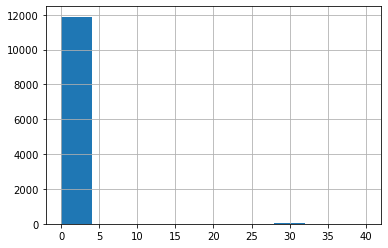

In [42]:
xToAnalyse["DISCOUNT"].hist()

<AxesSubplot:>

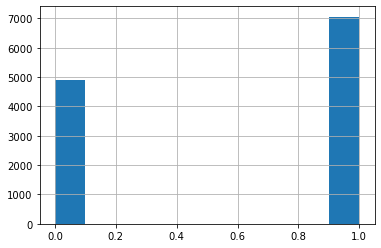

In [43]:
xToAnalyse["CHURN_LABEL"].hist()

In [44]:
xToAnalyse[colsDisc].head(20)

,0,5,10,15,20,25,30,35,40,45,50,55,60,70
0,0.0,-12.923233,-15.846466,-18.769699,-21.692932,-24.616165,-27.539398,-30.462631,-33.385865,-36.309098,-39.232331,-42.155564,-45.078797,-50.925263
1,0.0,-20.192886,-35.578730,-42.914642,-46.365930,-48.849761,-63.734756,-75.787761,-86.080274,-96.527100,-106.186815,-116.953906,-127.720997,-149.255179
2,0.0,-15.664464,-21.328928,-26.993391,-32.657855,-38.322319,-43.986783,-49.651247,-55.315710,-60.980174,-66.644638,-72.309102,-77.973566,-89.302493
3,0.0,-16.482713,-28.089587,-31.047416,-34.972897,-37.591481,-43.310604,-46.416779,-55.388987,-56.486786,-59.936094,-63.900077,-67.864059,-75.792024
4,0.0,-19.985718,-30.504289,-39.166729,-55.629963,-65.961807,-75.651281,-95.971709,-101.479258,-113.435672,-126.640210,-136.701958,-146.763706,-166.887202
5,0.0,-12.576926,-15.153853,-17.730779,-20.307705,-22.884632,-25.461558,-28.038484,-30.615411,-33.192337,-35.769263,-38.346190,-40.923116,-46.076969
6,0.0,-17.632741,-25.265483,-32.898224,-40.530966,-48.163707,-55.796449,-63.429190,-71.061932,-78.694673,-86.327415,-93.960156,-101.592898,-116.858381
7,0.0,-20.976636,-33.368504,-45.511623,-59.473221,-54.793400,-69.383363,-81.290358,-97.352145,-115.677143,-130.857975,-147.803390,-164.748805,-198.639636
8,0.0,-13.187316,-17.943696,-26.083243,-35.603276,-40.621610,-35.916608,-41.762095,-49.471642,-57.904634,-61.573338,-67.954958,-74.336578,-87.099819
9,0.0,-21.623829,-33.714266,-51.108103,-62.805233,-73.713580,-84.613689,-100.578995,-109.849821,-121.058234,-135.243016,-148.316039,-161.389062,-187.535109


In [45]:
xToAnalyse["CLIENT_TO_CONTACT"] = 'NO'
xToAnalyse["CLIENT_TO_CONTACT"][xToAnalyse["DISCOUNT"]!=0] = 'YES'

<AxesSubplot:>

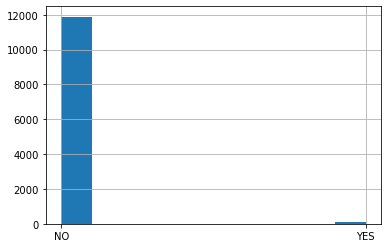

In [46]:
xToAnalyse["CLIENT_TO_CONTACT"].hist()

In [47]:
xToAnalyse.columns

Index(['DATA', 'INCOME', 'OVERCHARGE', 'LEFTOVER', 'HOUSE',
       'OVER_15MINS_CALLS_PER_MONTH', 'REPORTED_SATISFACTION',
       'CONSIDERING_CHANGE_OF_PLAN', 'CHURNED', 'CHURN_LABEL',
       'CHURN_PROBABILITY', 'disc_0', '0', 'disc_5', '5', 'disc_10', '10',
       'disc_15', '15', 'disc_20', '20', 'disc_25', '25', 'disc_30', '30',
       'disc_35', '35', 'disc_40', '40', 'disc_45', '45', 'disc_50', '50',
       'disc_55', '55', 'disc_60', '60', 'disc_70', '70', 'maxBenefit',
       'DISCOUNT', 'CLIENT_TO_CONTACT'],
      dtype='object')

# NOT LAUNCHED

# Client discount for validation

In [ ]:
xToAnalyse = pd.read_csv('df_validation_norm.csv', sep = ',')

In [ ]:
xToAnalyse["CHURN_LABEL"] = (clf_RF.predict_proba(xToAnalyse[selectedCols])[:,1] >= threshold).astype('int')
xToAnalyse["CHURN_PROBABILITY"] = clf_RF.predict_proba(xToAnalyse[selectedCols])[:,1]

In [ ]:
xToAnalyse["CHURN_PROBABILITY"].head(10)

In [ ]:
df_validation = pd.read_csv('df_validation.csv', sep = ',')

In [ ]:
originalFacture = df_validation["OVERCHARGE"] + df_validation["REVENUE"]

In [ ]:
discList = [0, 5, 10, 15, 20, 25, 30,35, 40, 45,50,55,60,70]
#discList = [0]
for disc in discList:
    beforeExpValue = np.multiply(xToAnalyse["CHURN_PROBABILITY"],originalFacture)
    xToAnalyse.iloc[:]["OVERCHARGE"]  = xToAnalyse["OVERCHARGE"]*(1.-float(disc)/float(100.))
    afterProba = clf_RF.predict_proba(xToAnalyse[selectedCols])[:,1]
    if disc == 0:
        afterExpValue = beforeExpValue
    else:
        afterExpValue = np.multiply(afterProba,originalFacture)*(1.-float(disc)/float(100.)) - 10.
        
    benefit = afterExpValue - beforeExpValue
    xToAnalyse["disc_"+str(disc)] = disc
    xToAnalyse[str(disc)] = benefit

In [ ]:
colsDisc = []
[colsDisc.append(str(disc)) for disc in discList]
colsDisc

In [ ]:
xToAnalyse["maxBenefit"] = xToAnalyse[colsDisc].loc[:].max(axis=1)
xToAnalyse["DISCOUNT"] = xToAnalyse[colsDisc].loc[:].idxmax(axis=1).astype(int)


In [ ]:
xToAnalyse["DISCOUNT"].hist()

In [ ]:
xToAnalyse["CHURN_LABEL"].hist()

In [ ]:
xToAnalyse[colsDisc].head(20)

In [ ]:
xToAnalyse["CLIENT_TO_CONTACT"] = 'NO'
xToAnalyse["CLIENT_TO_CONTACT"][xToAnalyse["DISCOUNT"]!=0] = 'YES'

In [ ]:
xToAnalyse["CLIENT_TO_CONTACT"].hist()

In [ ]:
xToAnalyse.columns

In [ ]:
df_result = xToAnalyse[["CHURN_PROBABILITY", "CHURN_LABEL", "CLIENT_TO_CONTACT", "DISCOUNT"]]

In [ ]:
df_result.to_csv("results.csv", sep=",")

### Exemple for one client

In [ ]:
reslist = []
iClient = 8
nbDisc = 10
maxBenefit = 0
discOpt = 0
for disc in range(nbDisc+1):
        beforeExpValue = xToAnalyse["proba"][iClient]*originalFacture[iClient]
        afterPrice  = xToAnalyse["OVERCHARGE"][iClient]*(1.-float(disc)/float(nbDisc))
        xToAnalyse[selectedCols].iloc[iClient]["OVERCHARGE"] = afterPrice
        afterProba = clf_RF.predict_proba(xToAnalyse[selectedCols].loc[iClient:iClient])[:,1][0]
        afterExpValue = afterProba*originalFacture[iClient]*(1.-float(disc)/float(nbDisc)) - 10.
        benefit = afterExpValue - beforeExpValue
        #reslist.append([disc, beforeExpValue, afterPrice, afterProba, afterExpValue, benefit])
        reslist.append([disc, benefit])